# Shop Customer EDA

## By Ibuodinma Somtochukwu I


## Description
>Shop Customer Data a dataset of customers of an ideal shop. The information is supposedly gleaned from the membership cards.

 Dataset consists of 2000 records and 8 columns:

* Customer ID
* Gender
* Age
* Annual Income
* Spending Score - Score assigned by the shop, based on customer behavior and spending nature
* Profession
* Work Experience - in years
* Family Size

## Objectives
* Explore distributions of numeric columns using histograms etc.
* Explore relationship between columns using scatter plots, bar charts etc.
* Derive interesting insights from the exploratory analysis



In [90]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [91]:
df_customer = pd.read_csv('Customers.csv')#reading the csv file into a dataframe

In [92]:
df_customer.head(5)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


## Assessing and Cleaning the dataset

In [93]:
df_customer.info()# checking the basic property of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


###  Observations

* The column *Profession* has incomplete data
* 2000 rows and 18 columns
* The numerical data include CustomerID, Annual Income ($), Spending Score (1-100), Work Experience, Family Size
* For ease of evaluation we need to modify the names of the columns eg using underscore to separate the names that comprise two words and removing brackets and dollars sign which are recognized symbols in python


In [94]:
df_customer.describe()# basic descriptive stats of the variables

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


In [95]:
df_customer.columns= df_customer.columns.str.replace(' ', '_')# replacing spaces in the column names with underscores

Dealing with missing values in the *Profession* column

The missing values contain significant data in other columns, hence should not be dropped

We replace 'nan' with 'Not Available'

In [96]:
df_customer[df_customer.Profession.isna()].head()# the missing values

,CustomerID,Gender,Age,Annual_Income_($),Spending_Score_(1-100),Profession,Work_Experience,Family_Size
79,80,Female,49,98000,42,NaN,1,1
118,119,Female,51,84000,43,NaN,2,7
219,220,Female,59,76000,61,NaN,9,1
237,238,Male,95,36000,35,NaN,0,4
437,438,Male,76,136259,14,NaN,0,7


In [97]:
df_customer.Profession= df_customer.Profession.fillna('Not Available')#filling the nan with Not Available


In [98]:
df_customer.Profession.unique()#Checking for the data

array(['Healthcare', 'Engineer', 'Lawyer', 'Entertainment', 'Artist',
       'Executive', 'Doctor', 'Homemaker', 'Marketing', 'Not Available'],
      dtype=object)

In [99]:
df_customer.columns= df_customer.columns.str.replace('(_\(\$\))', '')#removing the dollar sign and the brackets


In [100]:
df_customer.columns= df_customer.columns.str.replace('(_\(1-100\))', '')#removing the brackets

In [101]:
df_customer.head()# checking for the applied changes

,CustomerID,Gender,Age,Annual_Income,Spending_Score,Profession,Work_Experience,Family_Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [102]:
#summary Statistics of the Numerical Columns
df_customer.describe()[['Family_Size','Age','Annual_Income','Spending_Score','Work_Experience']]

,Family_Size,Age,Annual_Income,Spending_Score,Work_Experience
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.768500,48.960000,110731.821500,50.962500,4.102500
std,1.970749,28.429747,45739.536688,27.934661,3.922204
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,25.000000,74572.000000,28.000000,1.000000
50%,4.000000,48.000000,110045.000000,50.000000,3.000000
75%,5.000000,73.000000,149092.750000,75.000000,7.000000
max,9.000000,99.000000,189974.000000,100.000000,17.000000


## Distributions of values  of the Numeric Columns

In [103]:
def my_hist(df,col,x_lab=None,y_lab=None,title=None,bins=None):
    sb.set_style('darkgrid')
    plt.hist(data=df, x= col,bins=bins);
    plt.xlabel(x_lab,fontsize=15);
    plt.ylabel(y_lab,fontsize=15);
    plt.title(title,fontsize=15);


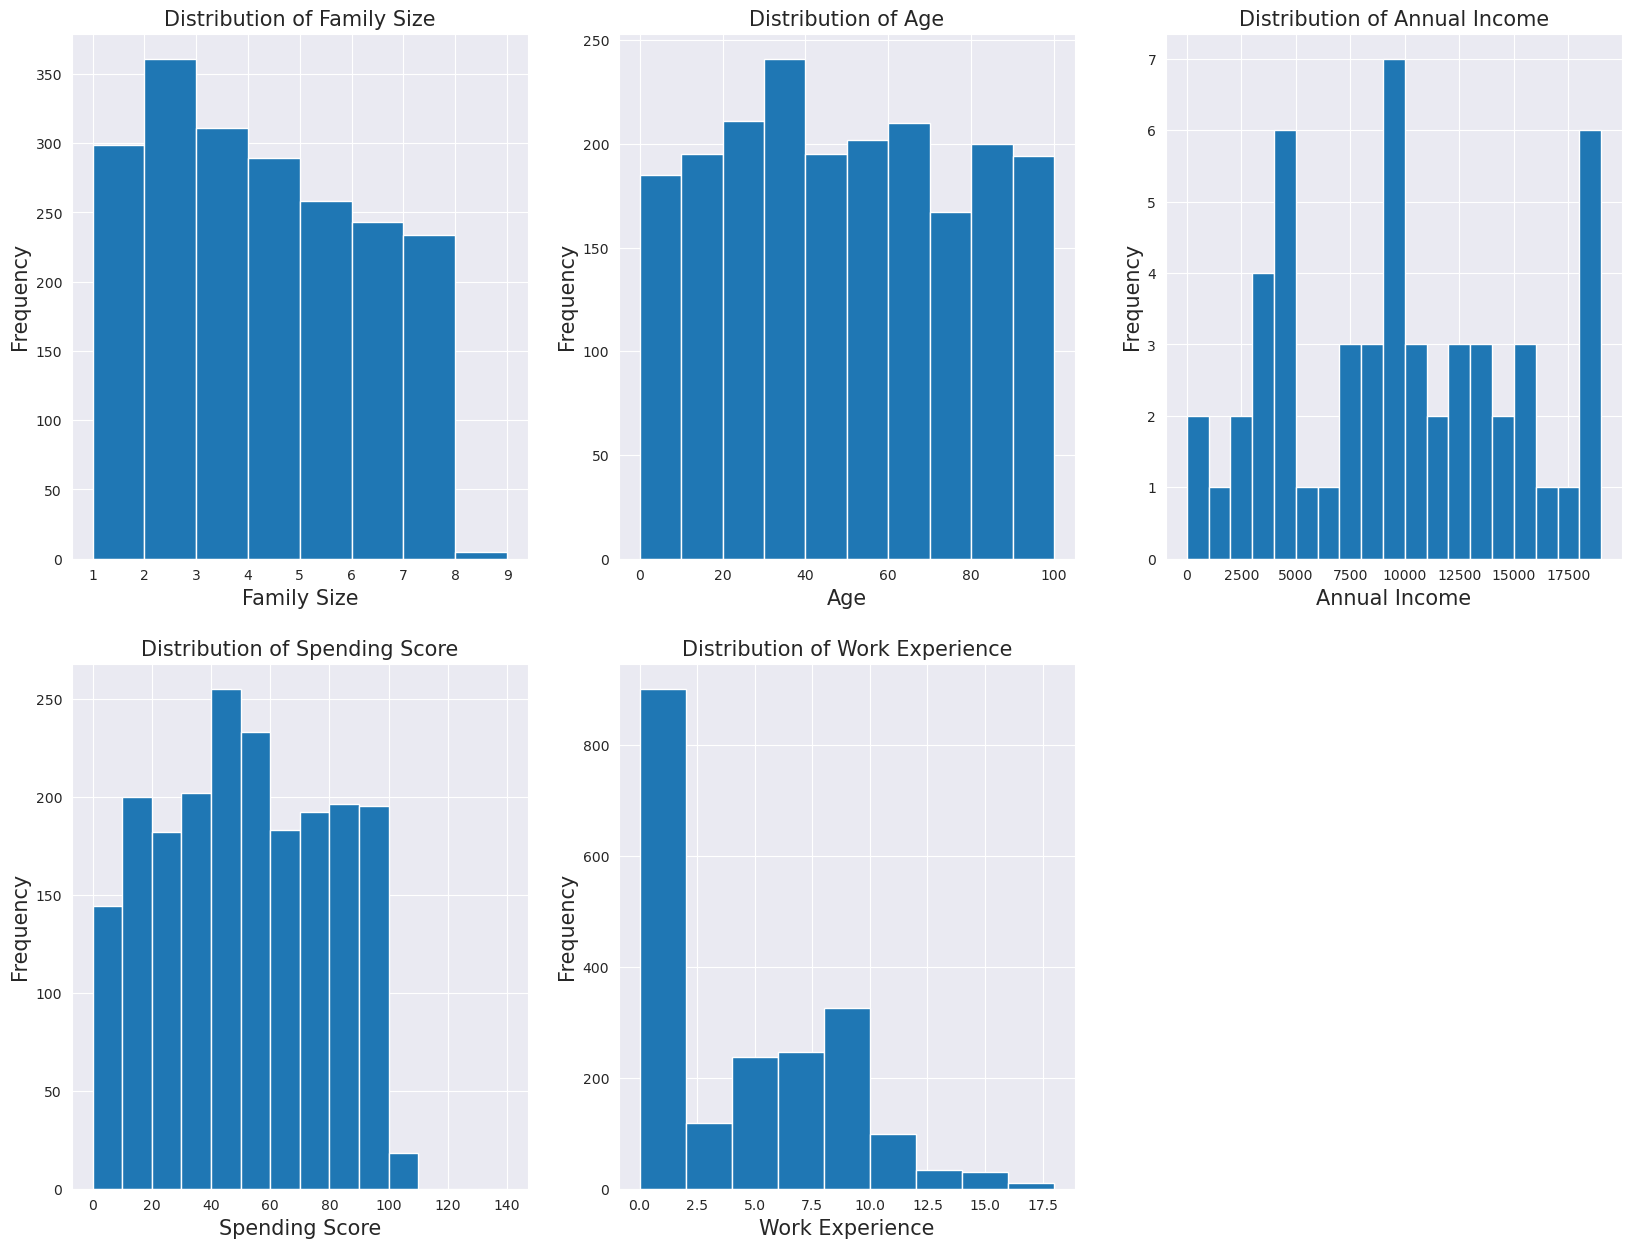

In [104]:

plt.figure(figsize=(20,15))
#plotting distribution of Family size
plt.subplot(2,3,1)
x_lab= 'Family Size'
y_lab= 'Frequency'
title= 'Distribution of Family Size'
bins= np.arange(1,10,1);
my_hist(df_customer,'Family_Size',x_lab,y_lab,title,bins=bins);


#plotting distribution of Age
plt.subplot(2,3,2)
x_lab= 'Age'
y_lab= 'Frequency'
title= 'Distribution of Age'
bins= np.arange(0,110,10);
my_hist(df_customer,'Age',x_lab,y_lab,title,bins=bins);

#plotting distribution of Annual income
plt.subplot(2,3,3)
x_lab= 'Annual Income'
y_lab= 'Frequency'
title= 'Distribution of Annual Income'
bins= np.arange(0,20000,1000);
my_hist(df_customer,'Annual_Income',x_lab,y_lab,title,bins=bins);


#plotting distribution of Spending score 
plt.subplot(2,3,4)
x_lab= 'Spending Score'
y_lab= 'Frequency'
title= 'Distribution of Spending Score'
bins= np.arange(0,150,10);
my_hist(df_customer,'Spending_Score',x_lab,y_lab,title,bins);

#plotting distribution of Work Experience
plt.subplot(2,3,5)
x_lab= 'Work Experience'
y_lab= 'Frequency'
title= 'Distribution of Work Experience'
bins= np.arange(0,20,2);
my_hist(df_customer,'Work_Experience',x_lab,y_lab,title,bins);

## Relationships Between Variables

### <u>Age vs Annual_Income</u>

In [107]:
df_customer.Age.describe()

count    2000.000000
mean       48.960000
std        28.429747
min         0.000000
25%        25.000000
50%        48.000000
75%        73.000000
max        99.000000
Name: Age, dtype: float64

In [133]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(0, 99+10, 10)
bin_centers = bin_edges[:-1] + 5

In [131]:
# For the points in each bin, we compute the mean and standard error of the mean.
Annual_Income_mean = df_customer['Annual_Income'].groupby(Age_binned).mean()
Annual_Income_std = df_customer['Annual_Income'].groupby(Age_binned).std()

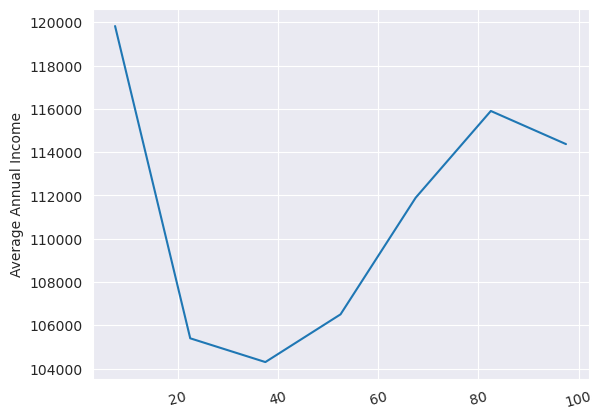

In [132]:
# Plot the summarized data
plt.errorbar(x=bin_centers, y=Annual_Income_mean)
plt.xticks(rotation=15);
plt.ylabel('Average Annual Income');

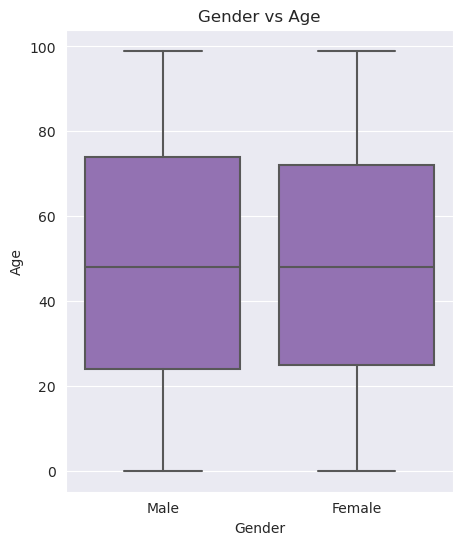

In [149]:
plt.figure(figsize=(5,6));
sb.boxplot(data=df_customer, x= 'Gender', y= 'Age',color=sb.color_palette()[4]);
plt.title('Gender vs Age');


### <u>Gender vs Profession</u>

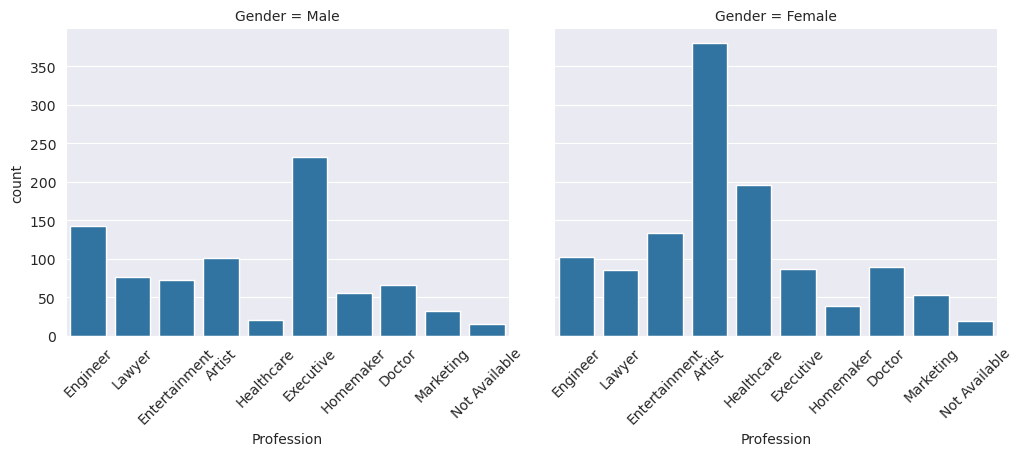

In [168]:
g= sb.FacetGrid(data=df_customer, col= 'Gender', height=4,aspect=1.3, margin_titles= True);
g.map(sb.countplot, 'Profession');
g.set_titles('{col_name}');
g.set_xticklabels(rotation=45);

### Questions for analyses
* Does Gender have any effect on Spending score?
* Which Profession earns more and do they spend more?
* Which age range spends more in the retail shop?
* Do experienced workers spend more?

#### 1. Does Family size have any effect on Spending score?

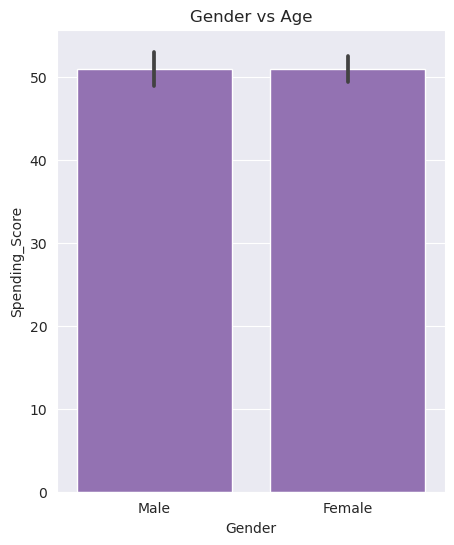

In [172]:
plt.figure(figsize=(5,6));
plt.scatter(data=df_customer, x= 'Family_Size', y= 'Spending_Score',color=sb.color_palette()[4]);
plt.title('Gender vs Age');
